# House Price Prediction: Data Analysis and Model Building
In this project, I embarked on the journey of predicting house prices by leveraging a dataset containing various features related to housing properties. Through rigorous data analysis and implementation of advanced techniques, I aimed to build an accurate model that could predict housing prices based on intrinsic factors.Welcome to the World of House Sales in King County, USA.

<a id="ch1"></a>
## Overview 
<hr/>

One of the objectives of this notebook is to **show step-by-step how to analyze and visualize the dataset to predict future home prices.** I will explain most of the concepts used so that you understand why they are used. On the base of features like sqft_living, bathrooms, bedrooms, view etc, I will build a deep learning model that can predict future house prices. 

</font></b>

<img src="https://images.pexels.com/photos/1546168/pexels-photo-1546168.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=750&w=1260" title="source: www.pexels.com" />
<br>

<a id="ch2"></a>
## Dataset
<hr/>

* This dataset contains house sale prices for King County, which includes Seattle. 
* It includes homes sold between May 2014 and May 2015.
* 21 columns. (features)
* 21613 rows.

***Feature Columns***
    
* **id:** Unique ID for each home sold
* **date:** Date of the home sale
* **price:** Price of each home sold
* **bedrooms:** Number of bedrooms
* **bathrooms:** Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* **sqft_living:** Square footage of the apartments interior living space
* **sqft_lot:** Square footage of the land space
* **floors:** Number of floors
* **waterfront:** - A dummy variable for whether the apartment was overlooking the waterfront or not
* **view:** An index from 0 to 4 of how good the view of the property was
* **condition:** - An index from 1 to 5 on the condition of the apartment,
* **grade:** An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* **sqft_above:** The square footage of the interior housing space that is above ground level
* **sqft_basement:** The square footage of the interior housing space that is below ground level
* **yr_built:** The year the house was initially built
* **yr_renovated:** The year of the house’s last renovation
* **zipcode:** What zipcode area the house is in
* **lat:** Lattitude
* **long:** Longitude
* **sqft_living15:** The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15:** The square footage of the land lots of the nearest 15 neighbors

In [1]:
# Data Analysis and Wrangling
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix


import warnings
warnings.filterwarnings("ignore")

### Loading and Exploring the Dataset.

In [2]:
data = pd.read_csv('kc_house_data.csv')

### Checking Dataset Dimensions.

In [3]:
data.shape

(21613, 21)

### Checking first 5 and last 5 records from the datasets.

In [4]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
data.tail()

id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[5 rows x 21 columns]

***Which features are available in the dataset?***

In [6]:
print(data.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


***Which features are categorical?***

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

* Categorical: id, waterfront, zipcode.

***Which features are numerical?***

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

* Continous: price, bathrooms, floors, lat, long.
* Discrete: date, bedrooms, sqft_living, sqft_lot, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15.

***Which features contain blank, null or empty values?***

We can check for missing values with pandas isnull(). This indicates whether values are missing or not. Then we can sum all the values to check every column.

In [7]:
data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

***What are the data types for various features?***

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Five features are floats, fifteen are integers and one is an object.

### Assumtions based on data analysis
​
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.
​
### Correlating
​
We want to know how well does each feature correlate with Price. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.
​
### Completing
​
Since there are no missing values we do not need to complete any values. 
​
### Correcting
​
Id feature may be dropped from our analysis since it does not add value.
Date feature may be dropped since we are going to do feature engineering and make a year and month column.
Zipcode feature is a special case, we could use it, but since we do not know exactly the zones of King County we are just going to drop it. 
​
### Creating
​
We may want to create a new feature called Year based on Date to analyze the price change throughout the years.
We may want to create a new feature call

<a id="ch4"></a>
## Working with Feature Data
<hr/>

### Correcting by dropping features
By dropping features, we are dealing with fewer data points. Speeds up our notebook and eases the analysis. Based on our assumptions and decisions we want to drop the Id, zipcode and Date features. 

In [9]:
data = data.drop('id', axis=1)
data = data.drop('zipcode',axis=1)

<a id="ch5"></a>
## Feature engineering
<hr/>

We want to engineer the date feature to make a year and month column. The feature date is as a string. With pd.to_datetime we can convert an argument to datetime.

In [10]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month


data = data.drop("date",axis=1)

data.sample()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
11274  205000.0         2        1.0         1060      8000     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
11274           0     0          3      6        1060              0   

       yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  \
11274      1941             0  47.5088 -122.333           1390        8000   

       year  month  
11274  2014      7

***What is the distribution of numerical feature values across the samples?***

In [11]:
desc_stats = data.describe().T

# Create a custom style for the DataFrame visualization
def custom_style(val):
    color = '#606ff2'
    return f'background-color: {color}; color: white'

# Apply the custom style to the whole DataFrame
styled_desc_stats = desc_stats.style.applymap(custom_style)

# Apply background gradient to 'std' column using 'PuBu' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['std'], cmap='PuBu')

# Apply background gradient to '50%' column using 'PuBu' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['50%'], cmap='PuBu')

# Display the styled descriptive statistics DataFrame
styled_desc_stats

<a id="ch3"></a>
# Exploratory Data Analysis
<hr/>

### Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

## Automated Univariate Analysis

In this section, we'll explore a convenient way to perform Univariate Analysis for all columns in our dataset without having to manually code each analysis. Univariate Analysis involves examining individual variables one at a time. Instead of repeating the same analysis code for each column, we can create a function that automates this process.




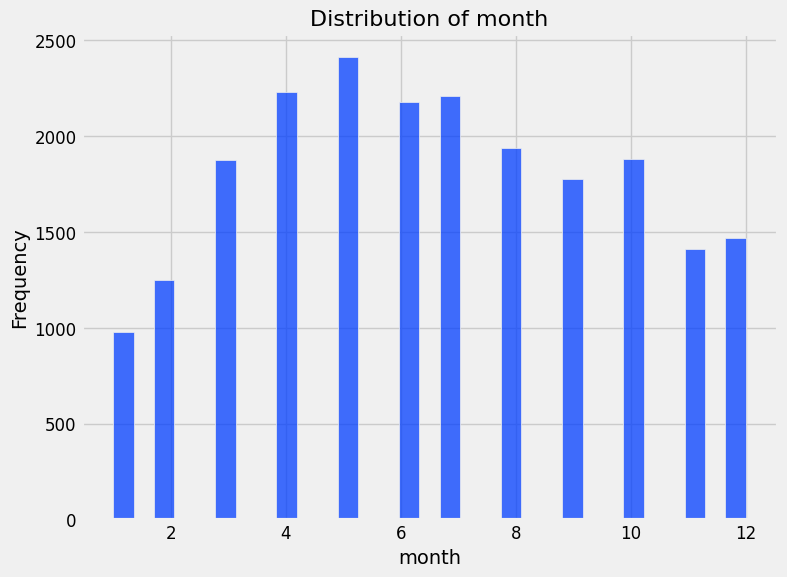

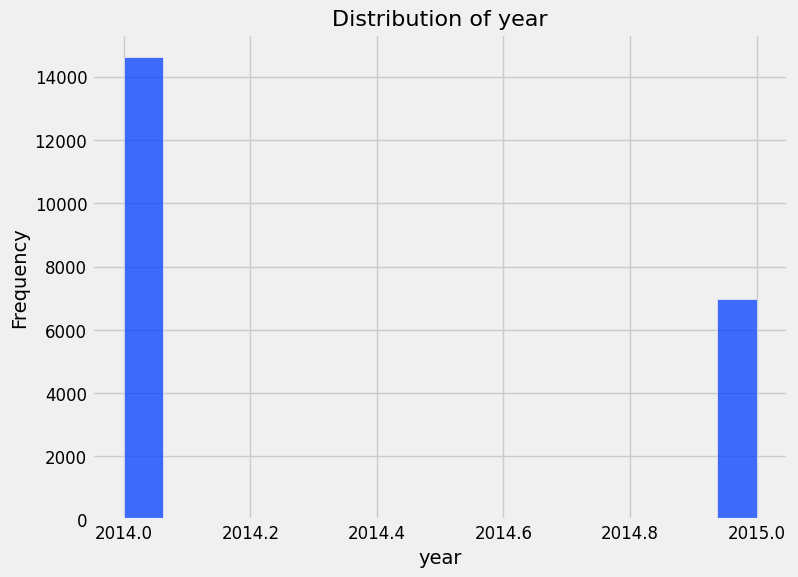

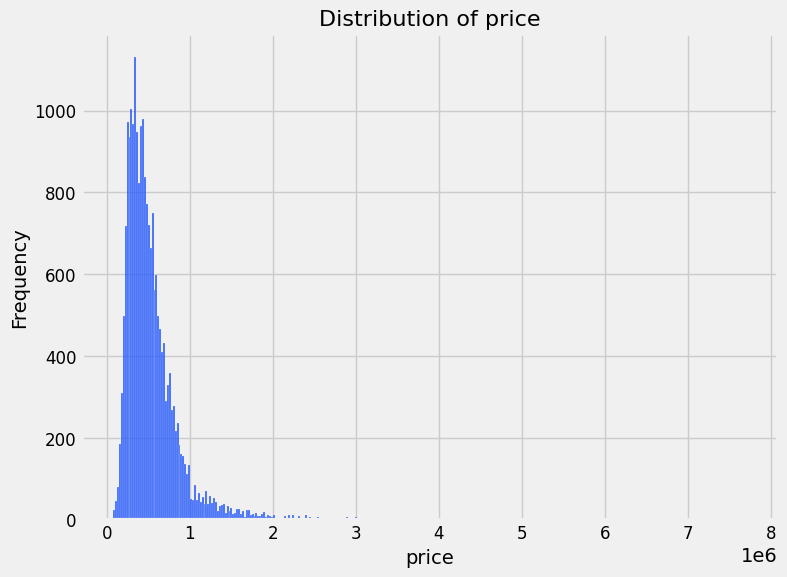

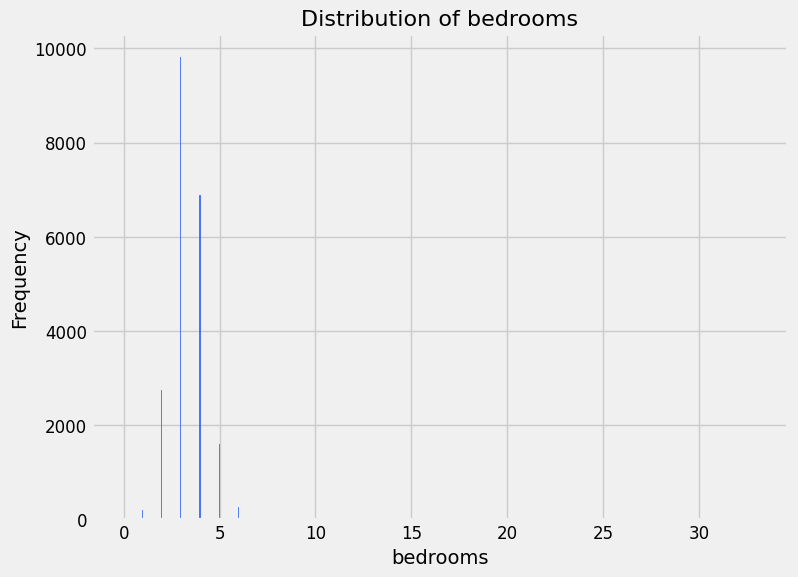

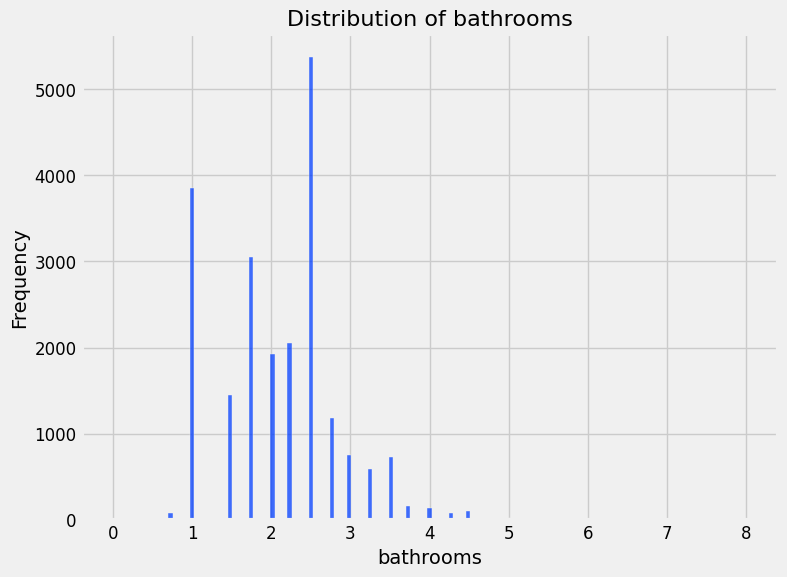

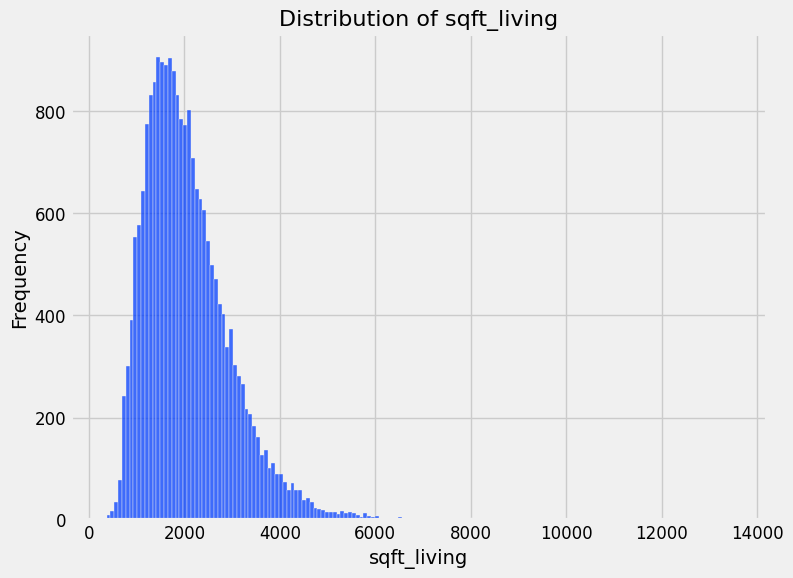

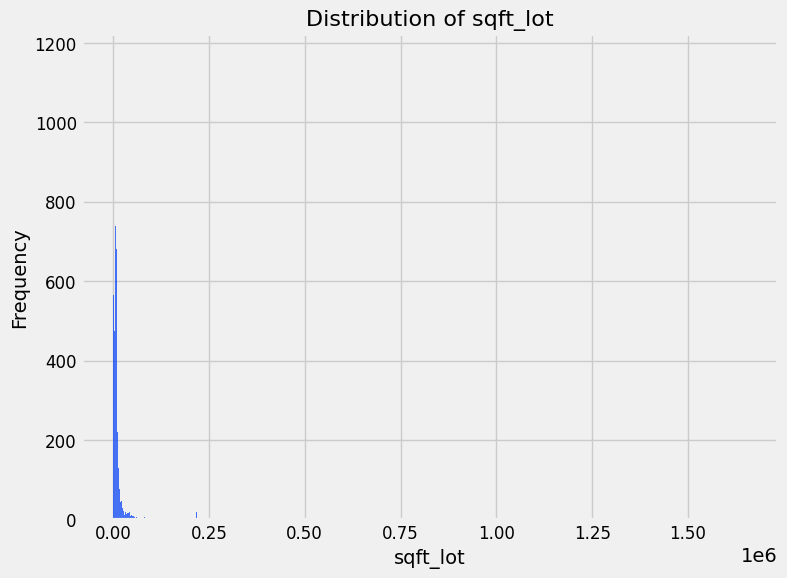

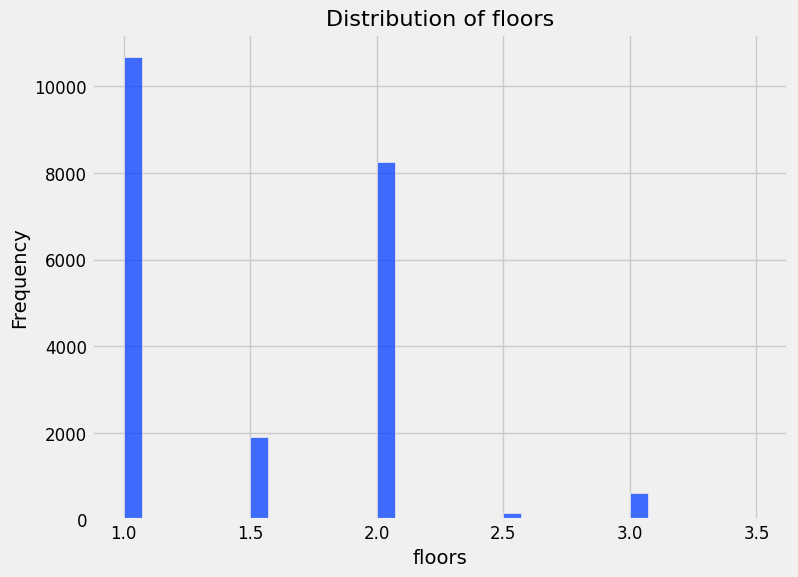

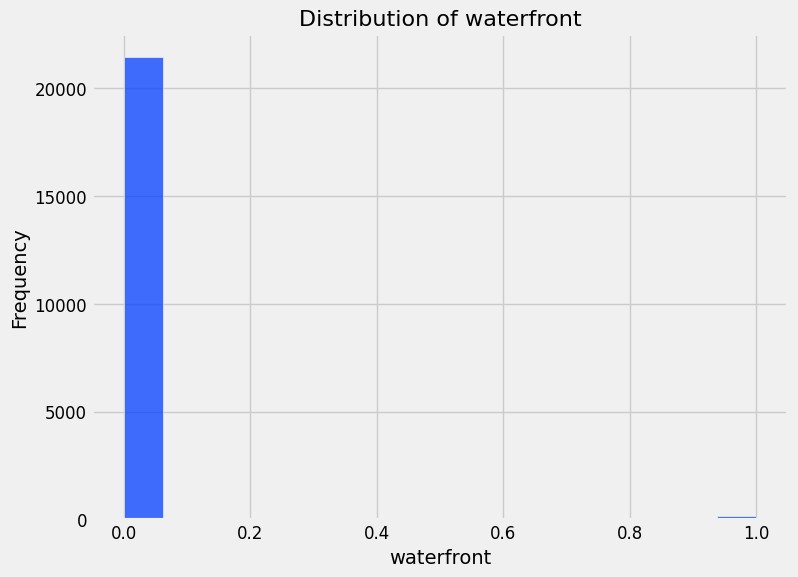

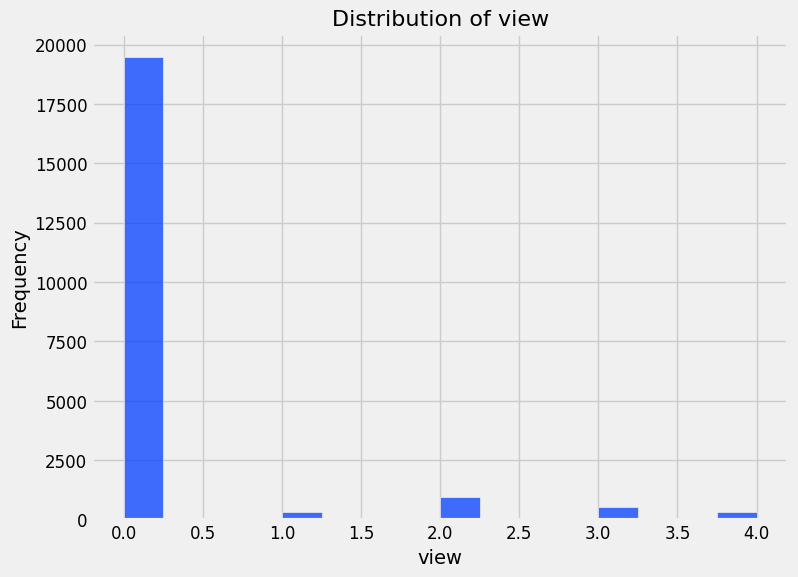

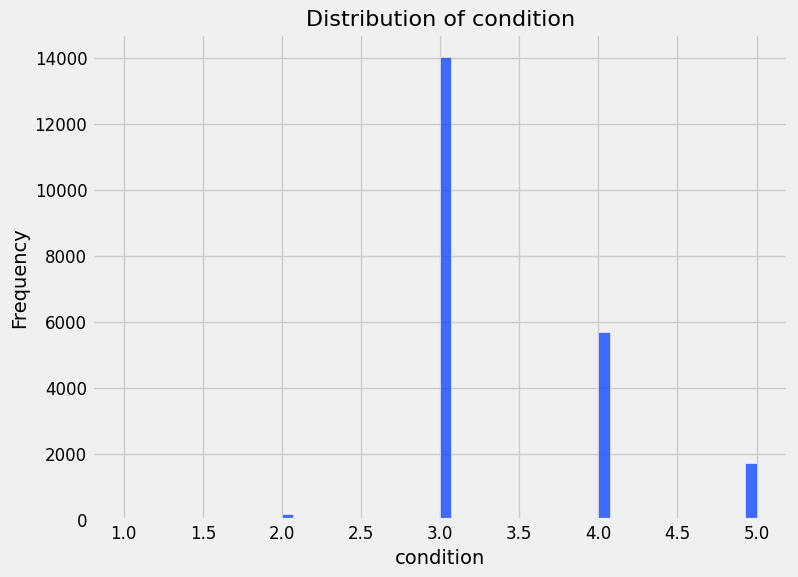

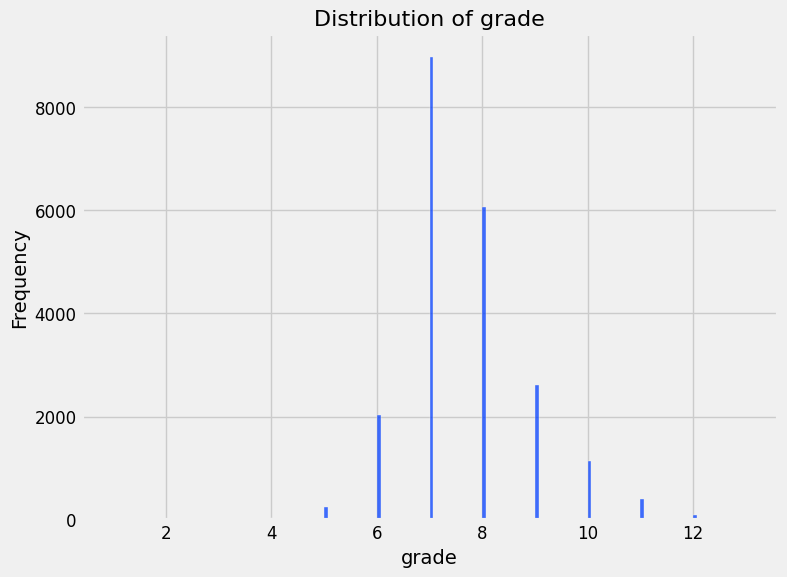

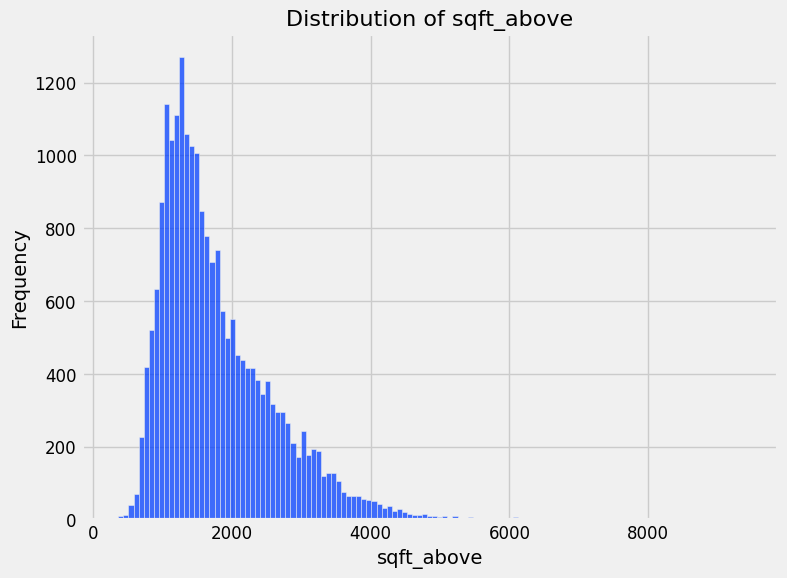

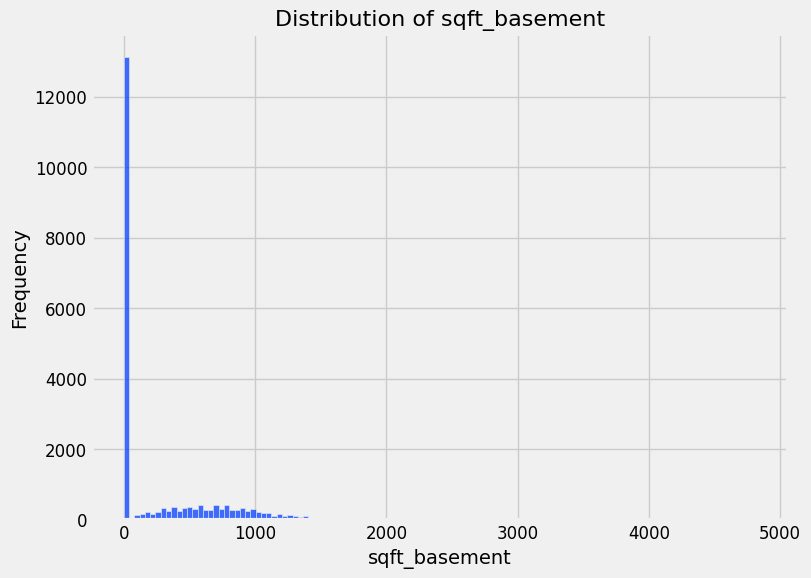

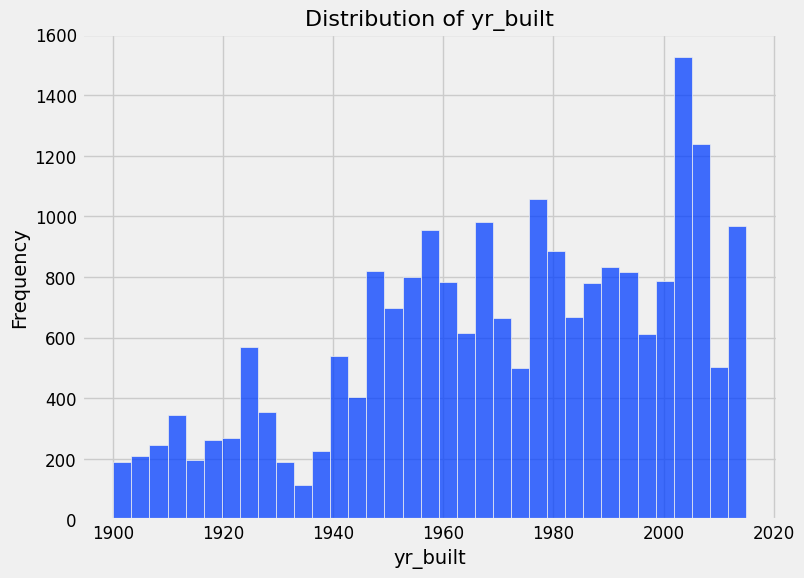

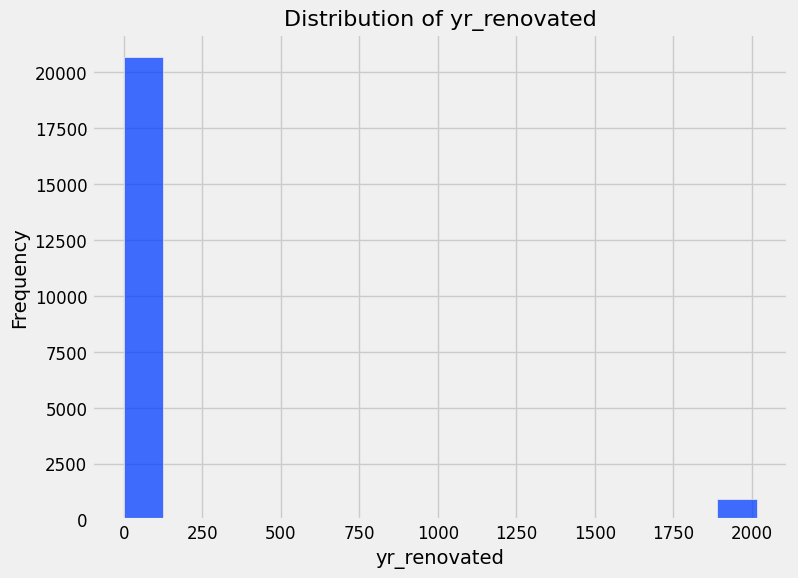

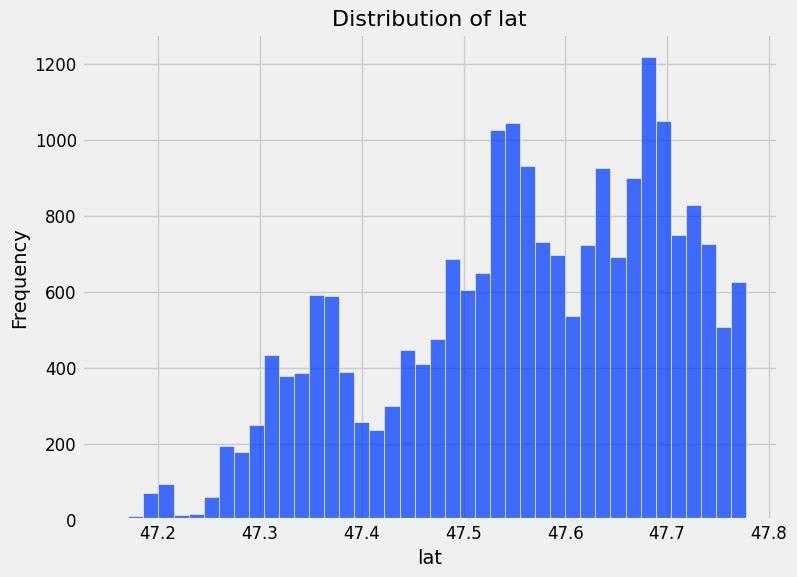

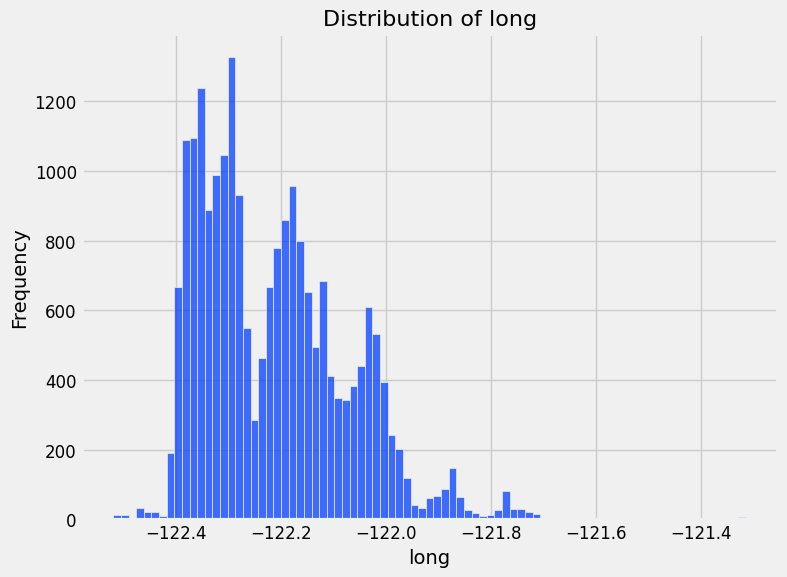

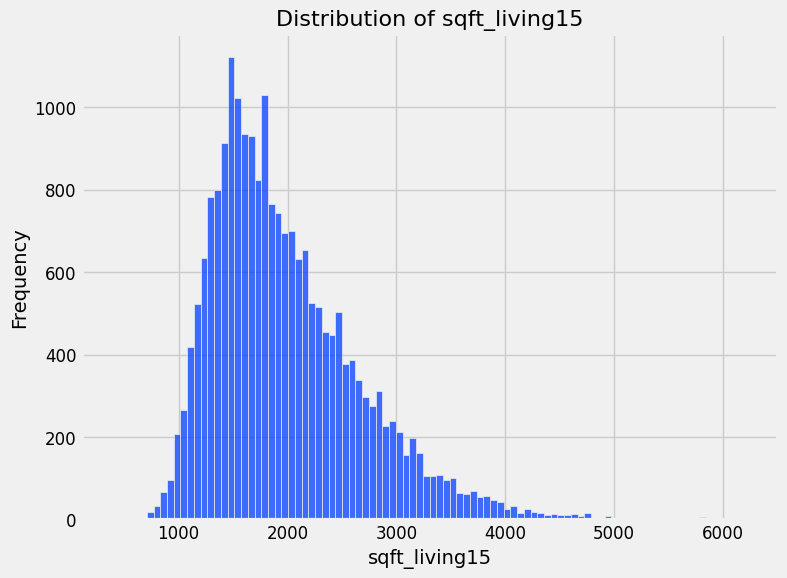

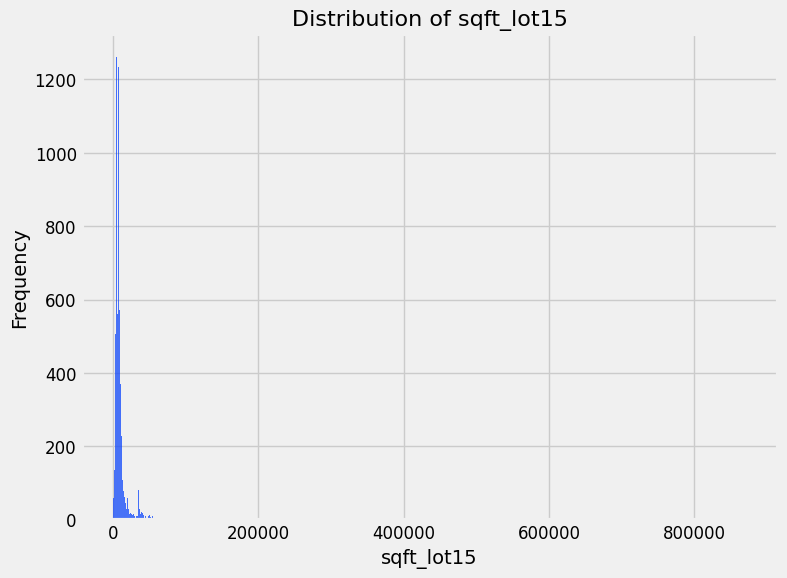

In [12]:
# List of columns in the data
columns = ['month', 'year', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
           'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
           'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
           'sqft_living15', 'sqft_lot15']

# Using the "fivethirtyeight" style
plt.style.use('fivethirtyeight')
sns.set_palette("bright")

for column in columns:
    plt.figure(figsize=(8, 6))
    
    if data[column].dtype == 'int64' or data[column].dtype == 'float64':
        # Numerical columns
        plt.title(f'Distribution of {column}', fontsize=16)
        sns.histplot(data=data[column])
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
        
    elif data[column].dtype == 'object':
        # Categorical columns
        plt.title(f'Count of {column}', fontsize=16)
        sns.countplot(data=data, x=column, order=data[column].value_counts().index, palette='viridis')
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()


# Bivariate Analysis

### Pearson correlation matrix
We use the Pearson correlation coefficient to examine the strength and direction of the linear relationship between two continuous variables.

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables. For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables. 

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

<Axes: title={'center': 'Pearson Correlation Matrix'}>

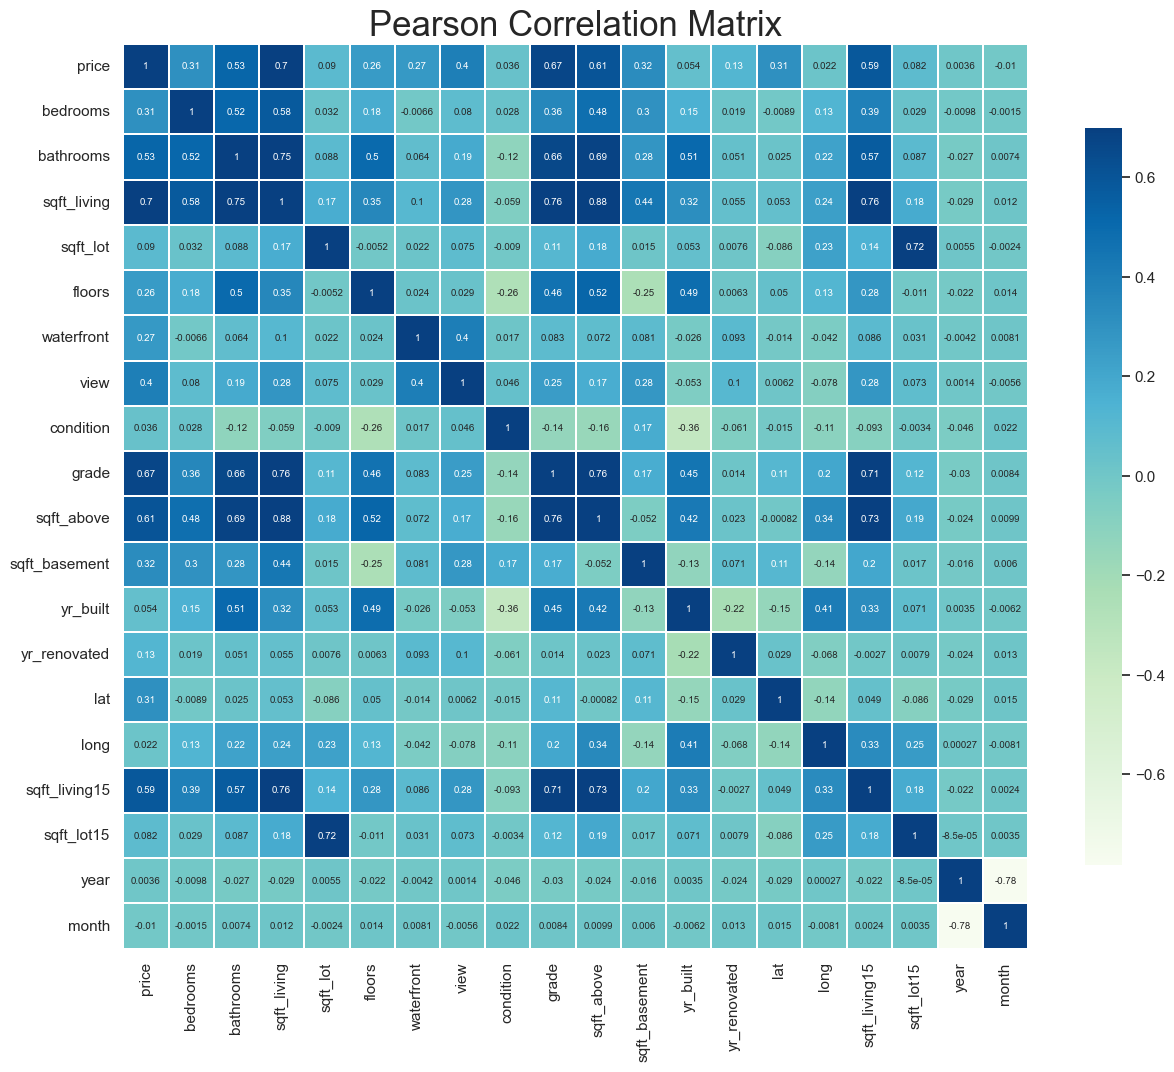

In [13]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(data.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

### Price correlation
* This allow us to explore labels that are highly correlated to the price.
* sqft_living looks like a highly correlated label to the price, as well as grade, sqft_above, sqft_living15 and bathrooms.`m

***Which features are more correlated to the price?***

In [14]:
price_corr = data.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
Name: price, dtype: float64


### Exploring Price Distribution and Relationships with Square Footage

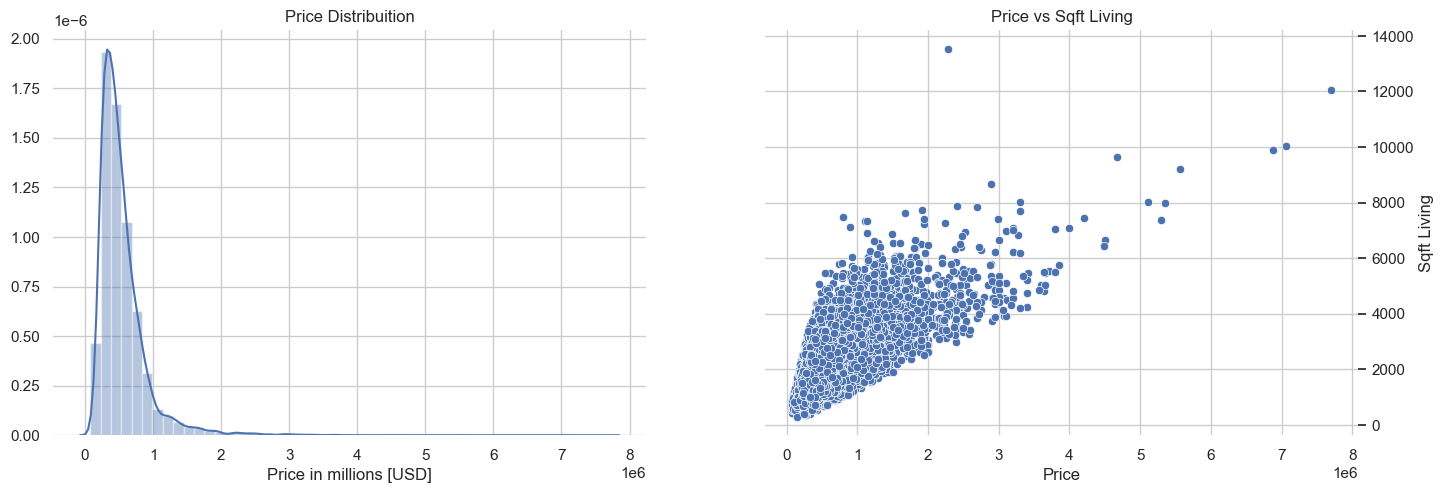

In [15]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(data['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=data, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

### Price feature 
* Most of the house prices are between \\$0 and \\$1,500,000.
* The average house price is \\$540,000.
* Keep in mind that it may be a good idea to drop extreme values. For instance, we could focus on house from \\$0 to \\$3,000,000 and drop the other ones.
* It seems that there is a positive linear relationship between the price and sqft_living.
* An increase in living space generally corresponds to an increase in house price.

### Bedrooms and floors box plots
Box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot. Outliers may be plotted as individual points. The spacings between the different parts of the box indicate the degree of dispersion (spread). 

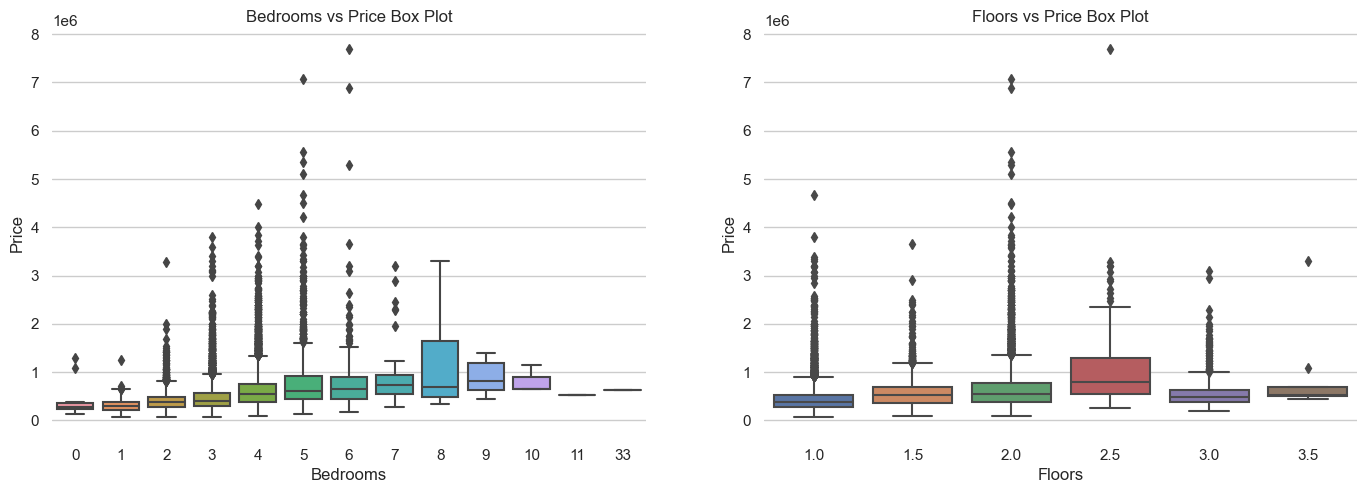

In [16]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=data['bedrooms'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['floors'],y=data['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot');

* We can see outliers plotted as individual points; this probably are the more expensive houses.
* We can see that the price tends to go up when the house has more bedrooms. 

### Waterfront, view and grade box plots

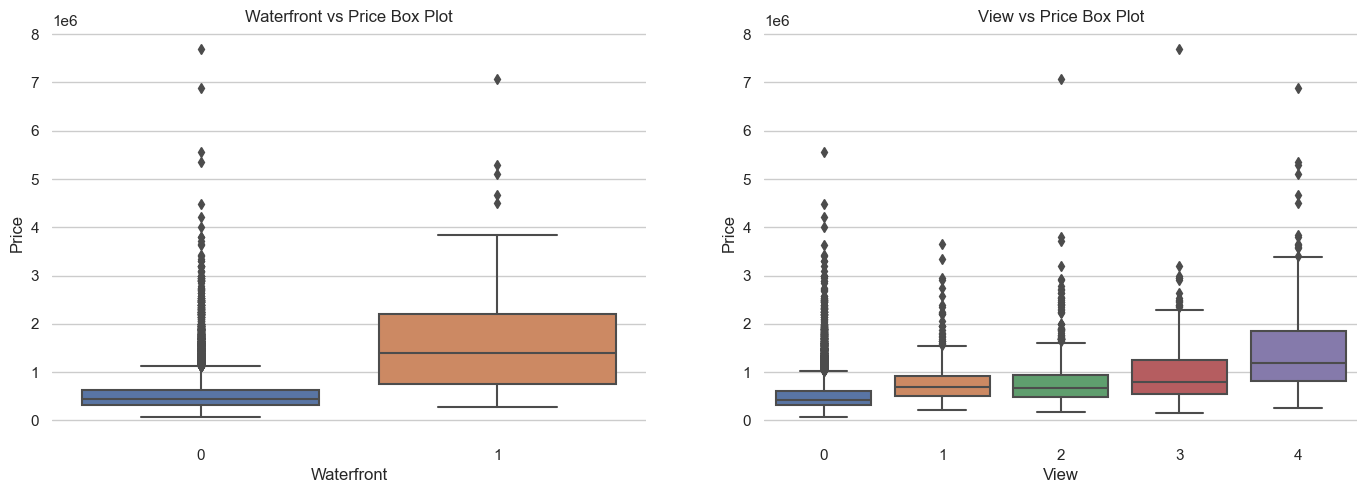

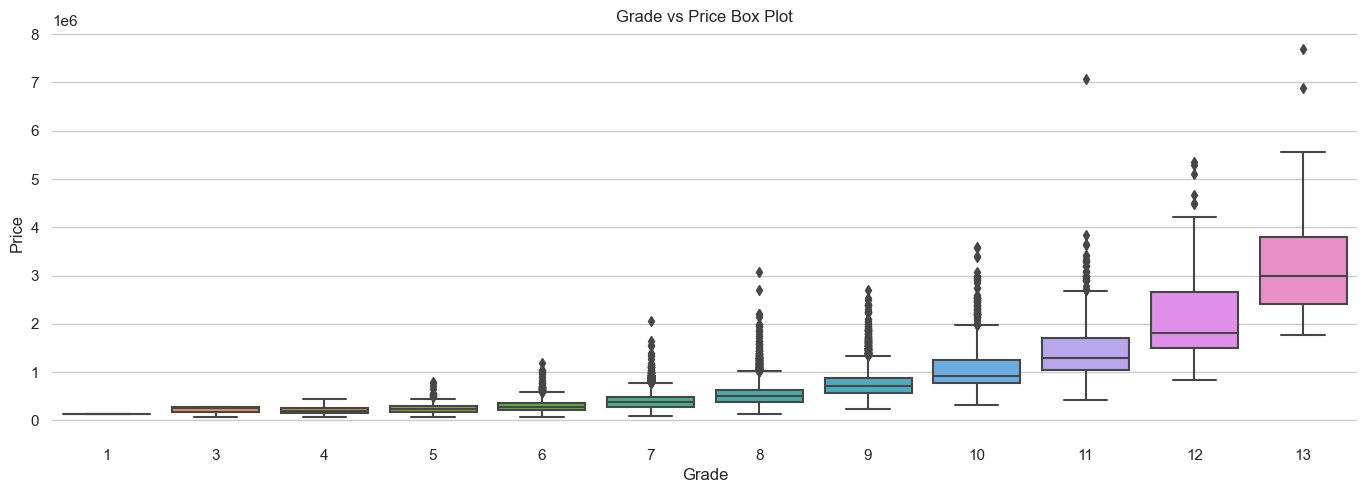

In [17]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=data['waterfront'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['view'],y=data['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=data['grade'],y=data['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot');

* Waterfront houses tends to have a better price value.
* The price of waterfront houses tends to be more disperse and the price of houses without waterfront tend to be more concentrated.
* Grade and waterfront effect price. View seem to effect less but it also has an effect on price.

### Interactive Map: Housing Conditions and Prices Visualization

In [18]:
fig = px.scatter_mapbox(
    data,  # Our DataFrame
    lat="lat",
    lon= "long",
    color="condition",
    center={"lat": data["lat"].mean(), "lon": data["long"].mean()},  # Center map based on data mean
    width=800,  # Width of map
    height=600,  # Height of map
    hover_data=["price"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

Utilizing the Plotly library, this code snippet creates an interactive scatter map to visualize housing conditions and their corresponding prices. The map is centered based on the average latitude and longitude of the dataset. Each data point is represented by a colored marker indicating the condition of the house. Hovering the mouse over a marker displays additional information, including the price of the house. The map provides an engaging and informative way to explore the geographical distribution of housing conditions and their associated prices. The map is styled using the "open-street-map" mapbox style.

### Exploring 3D Relationship: Latitude, Longitude, and Price

In [19]:
# Create the 3D scatter plot
fig = px.scatter_3d(
    data,
    x="lat",
    y="long",
    z="price",  # Using "price" as the z-axis variable
     # Color code based on house condition
    labels={"long": "longitude", "lat": "latitude", "price": "price"},
    width=700,
    height=600,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display the 3D scatter plot
fig.show()


This code snippet employs Plotly's capabilities to create an immersive 3D scatter plot that visualizes the interplay between latitude, longitude, and housing prices. Each data point is represented in 3D space, where latitude and longitude determine the position, and the price is indicated along the z-axis. The plot's markers are sized and styled for clarity and aesthetics, enhancing the visualization. This 3D scatter plot offers an insightful perspective on the geographical distribution of housing prices.

### Analyzing Price Patterns: Yearly and Monthly Trends

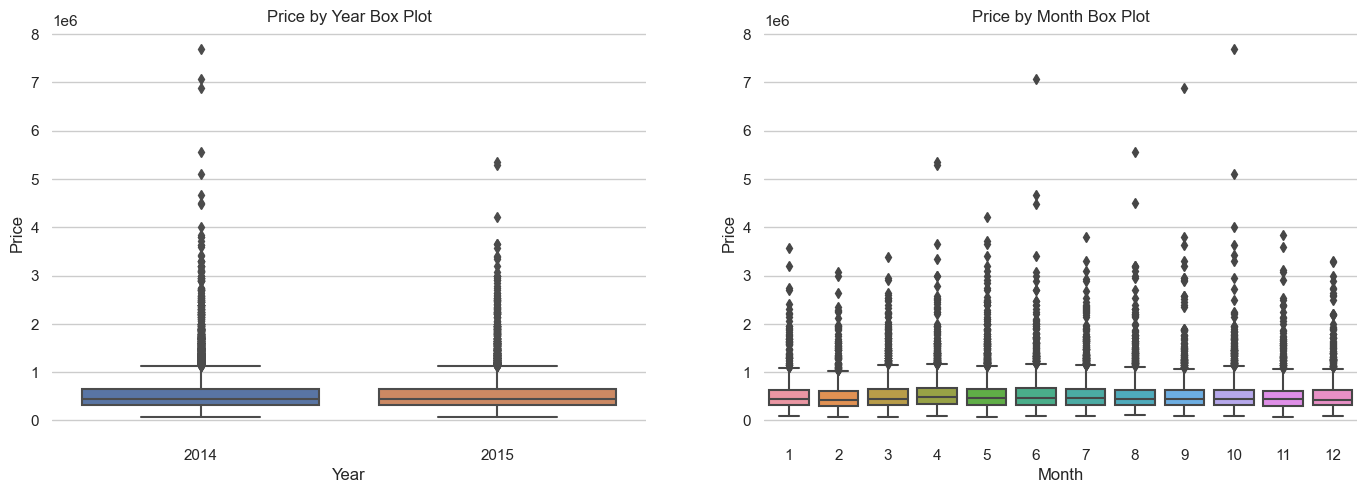

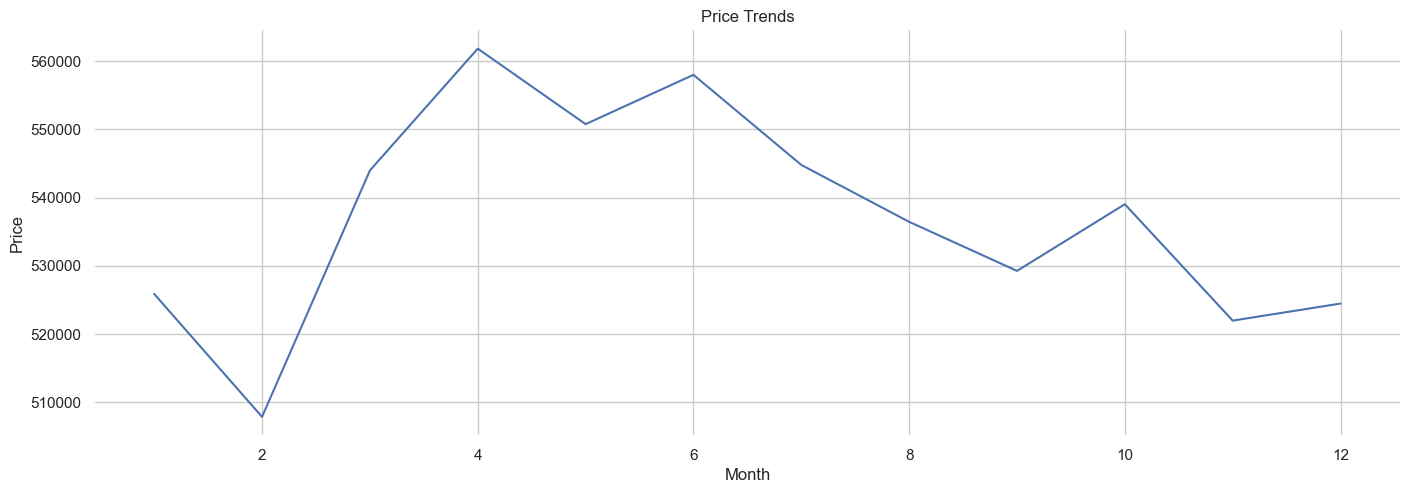

In [20]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=data, ax=axes[0])
sns.boxplot(x='month',y='price',data=data, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
data.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends');

<a id="ch6"></a>
## Scaling and train test split
<hr/>
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a mean squared error regression problem. We are also performing a category of machine learning which is called supervised learning as we are training our model with a given dataset.

In [21]:
# Features
X = data.drop('price',axis=1)

# Label
y = data['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 19)
(6484, 19)
(15129,)
(6484,)


### Normalizing / scaling the data
We scale the feature data. To prevent data leakage from the test set, we only fit our scaler to the training set.

In [23]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


<a id="ch7"></a>
## Creating a model
***
We estimate the number of neurons (units) from our features. Ex: X_train.shape (15117, 19). The optimizer is asking how you want to perform this gradient descent. In this case we are using the Adam optimizer and the mean square error loss function.

In [24]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

<a id="ch8"></a>
## Training the model
***
Now that the model is ready, we can fit the model into the data.

Since the dataset is large, we are going to use batch_size. It is typical to use batches of the power of 2 (32, 64, 128, 256...). In this case we are using 128. The smaller the batch size, the longer is going to take.

In [25]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 7ms/step - loss: 423620050944.0000 - val_loss: 432986259456.0000
Epoch 2/400
119/119 [==============================] - 1s 4ms/step - loss: 422500761600.0000 - val_loss: 429160235008.0000
Epoch 3/400
119/119 [==============================] - 1s 4ms/step - loss: 407914446848.0000 - val_loss: 395717672960.0000
Epoch 4/400
119/119 [==============================] - 1s 4ms/step - loss: 338038030336.0000 - val_loss: 279323377664.0000
Epoch 5/400
119/119 [==============================] - 1s 4ms/step - loss: 193817640960.0000 - val_loss: 134006497280.0000
Epoch 6/400
119/119 [==============================] - 1s 4ms/step - loss: 107430199296.0000 - val_loss: 105112289280.0000
Epoch 7/400
119/119 [==============================] - 1s 4ms/step - loss: 98734596096.0000 - val_loss: 103104012288.0000
Epoch 8/400
119/119 [==============================] - 1s 4ms/step - loss: 97241874432.0000 - val_loss: 101531156480.0000
Epoch 9/400
119/11

119/119 [==============================] - 1s 4ms/step - loss: 38321623040.0000 - val_loss: 37970841600.0000
Epoch 69/400
119/119 [==============================] - 1s 4ms/step - loss: 38222139392.0000 - val_loss: 37870653440.0000
Epoch 70/400
119/119 [==============================] - 1s 4ms/step - loss: 38061563904.0000 - val_loss: 37715681280.0000
Epoch 71/400
119/119 [==============================] - 1s 4ms/step - loss: 37865316352.0000 - val_loss: 37491224576.0000
Epoch 72/400
119/119 [==============================] - 1s 4ms/step - loss: 37740494848.0000 - val_loss: 37404364800.0000
Epoch 73/400
119/119 [==============================] - 1s 4ms/step - loss: 37674856448.0000 - val_loss: 37295656960.0000
Epoch 74/400
119/119 [==============================] - 1s 4ms/step - loss: 37540622336.0000 - val_loss: 37220986880.0000
Epoch 75/400
119/119 [==============================] - 1s 4ms/step - loss: 37441323008.0000 - val_loss: 37048496128.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 4ms/step - loss: 33681436672.0000 - val_loss: 33267685376.0000
Epoch 136/400
119/119 [==============================] - 0s 4ms/step - loss: 33658630144.0000 - val_loss: 33175040000.0000
Epoch 137/400
119/119 [==============================] - 0s 4ms/step - loss: 33605025792.0000 - val_loss: 33104259072.0000
Epoch 138/400
119/119 [==============================] - 0s 4ms/step - loss: 33595906048.0000 - val_loss: 33041528832.0000
Epoch 139/400
119/119 [==============================] - 0s 4ms/step - loss: 33552029696.0000 - val_loss: 33024917504.0000
Epoch 140/400
119/119 [==============================] - 0s 4ms/step - loss: 33490104320.0000 - val_loss: 33016705024.0000
Epoch 141/400
119/119 [==============================] - 1s 5ms/step - loss: 33462458368.0000 - val_loss: 32958480384.0000
Epoch 142/400
119/119 [==============================] - 1s 4ms/step - loss: 33451249664.0000 - val_loss: 32925462528.0000
Epoch 143/400
11

119/119 [==============================] - 1s 4ms/step - loss: 32019914752.0000 - val_loss: 31444305920.0000
Epoch 202/400
119/119 [==============================] - 1s 4ms/step - loss: 31999217664.0000 - val_loss: 31436435456.0000
Epoch 203/400
119/119 [==============================] - 1s 4ms/step - loss: 31958560768.0000 - val_loss: 31429058560.0000
Epoch 204/400
119/119 [==============================] - 0s 4ms/step - loss: 31959402496.0000 - val_loss: 31374159872.0000
Epoch 205/400
119/119 [==============================] - 1s 4ms/step - loss: 32081567744.0000 - val_loss: 31498401792.0000
Epoch 206/400
119/119 [==============================] - 0s 4ms/step - loss: 31972362240.0000 - val_loss: 31346898944.0000
Epoch 207/400
119/119 [==============================] - 1s 4ms/step - loss: 31908456448.0000 - val_loss: 31322564608.0000
Epoch 208/400
119/119 [==============================] - 1s 4ms/step - loss: 31895269376.0000 - val_loss: 31301629952.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 1s 4ms/step - loss: 30895947776.0000 - val_loss: 30441994240.0000
Epoch 268/400
119/119 [==============================] - 0s 4ms/step - loss: 30905591808.0000 - val_loss: 30306752512.0000
Epoch 269/400
119/119 [==============================] - 1s 4ms/step - loss: 30847297536.0000 - val_loss: 30296516608.0000
Epoch 270/400
119/119 [==============================] - 1s 4ms/step - loss: 30838732800.0000 - val_loss: 30307817472.0000
Epoch 271/400
119/119 [==============================] - 1s 4ms/step - loss: 30808555520.0000 - val_loss: 30270269440.0000
Epoch 272/400
119/119 [==============================] - 1s 4ms/step - loss: 30822070272.0000 - val_loss: 30491627520.0000
Epoch 273/400
119/119 [==============================] - 0s 4ms/step - loss: 30854619136.0000 - val_loss: 30227916800.0000
Epoch 274/400
119/119 [==============================] - 1s 4ms/step - loss: 30809327616.0000 - val_loss: 30235000832.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 1s 4ms/step - loss: 30148728832.0000 - val_loss: 29661560832.0000
Epoch 334/400
119/119 [==============================] - 1s 4ms/step - loss: 30079563776.0000 - val_loss: 29600757760.0000
Epoch 335/400
119/119 [==============================] - 0s 4ms/step - loss: 30053298176.0000 - val_loss: 29716695040.0000
Epoch 336/400
119/119 [==============================] - 0s 4ms/step - loss: 30118000640.0000 - val_loss: 29574678528.0000
Epoch 337/400
119/119 [==============================] - 0s 4ms/step - loss: 30031720448.0000 - val_loss: 29589243904.0000
Epoch 338/400
119/119 [==============================] - 1s 4ms/step - loss: 30063468544.0000 - val_loss: 29524105216.0000
Epoch 339/400
119/119 [==============================] - 1s 4ms/step - loss: 30088210432.0000 - val_loss: 29523963904.0000
Epoch 340/400
119/119 [==============================] - 1s 4ms/step - loss: 30015318016.0000 - val_loss: 29552080896.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 1s 4ms/step - loss: 29456877568.0000 - val_loss: 28986376192.0000
Epoch 400/400
119/119 [==============================] - 1s 4ms/step - loss: 29521782784.0000 - val_loss: 29005049856.0000


### Training loss per epoch


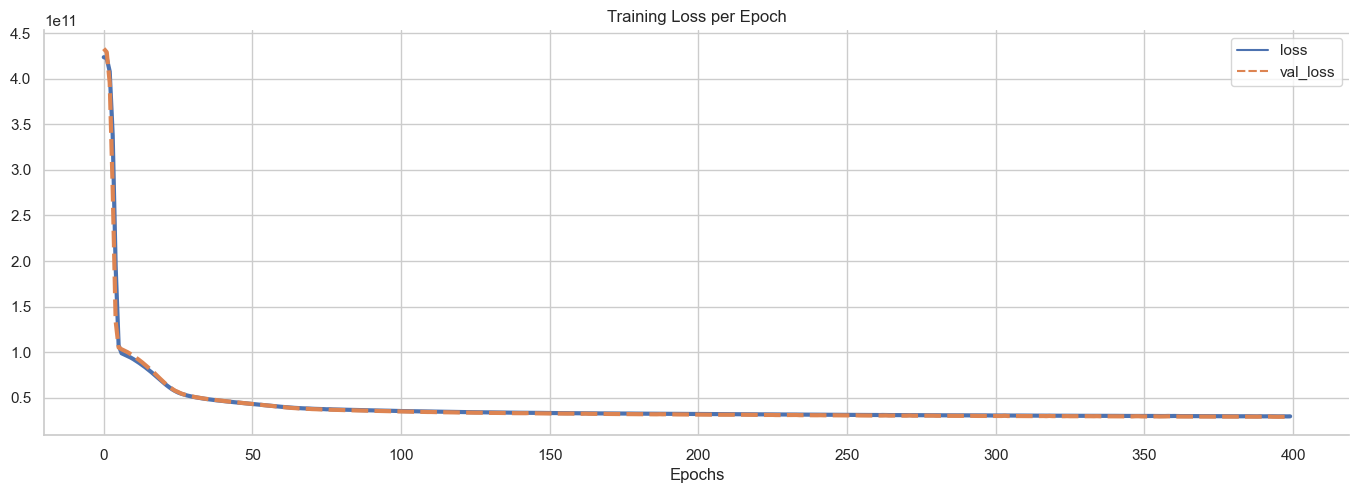

In [26]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

* This plot shows the training loss per epoch.
* This plot helps us to see if there is overfitting in the model. In this case there is no overfitting because both lines go down at the same time. 

<a id="ch9"></a>
## Evaluation on test data
---
### Regression Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Predicting on brand new data
In this part we are giving the model the test set to get a list of predictions. Then we compare the correct values with the list of predictions. We use different metrics to compare the predictions, in this case we use MAE, MSE, RMSE and Variance Regression Score. 

Let us start by analyzing the MAE, which is \\$103,500. This means that our model is off on average about \\$100,000.

***Is that MAE good or bad?***

For that we must take into account our original data set and see what kind of values we have. For instance, the mean is 540,000, therefore the MEA is about 19% of the mean price. This is not a particularly good result.

To better understand this error, we can use the variance regression score, where the best possible score is 1.0 and lower values are worse. This tells you how much variance is being explain by your model. In our case we have 0.80 which is a normal result. 

In [27]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',data['price'].describe())

203/203 [==============================] - 1s 2ms/step
MAE:  106078.57750086753
MSE:  29005046026.626514
RMSE:  170308.67865915265
Variance Regression Score:  0.7932301576575918


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


### Model predictions vs perfect fit
* We can compare the model predictions with a perfect fit to see how accurate the model is.
* The red line represents the perfect prediction. 
* We are being punish by the outliers, which are the expensive houses. Our model is not good predicting luxury houses.
* On the other hand, our model is good predicting the price of houses between o and \\$2 million. There is clearly a good fit. 
* It may be worth it retraining our model just on price houses below \\$3 million.

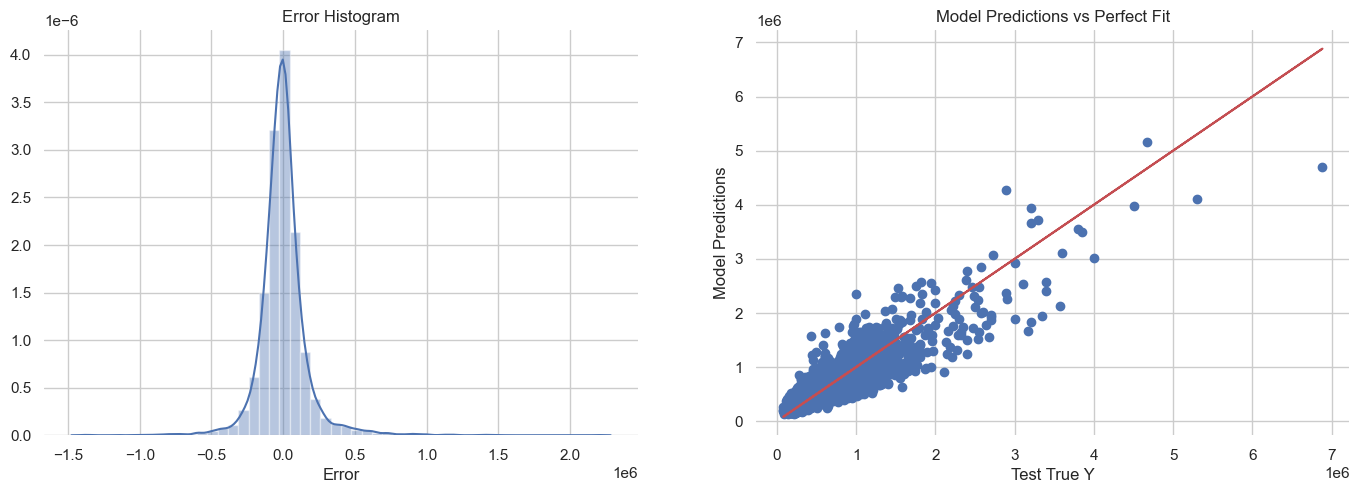

In [28]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(6484, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit');

<a id="ch10"></a>
## Predicting on a brand new house
---
We are going to use the model to predict the price on a brand-new house. We are going to choose the first house of the data set and drop the price. single_house is going to have all the features that we need to predict the price. After that we need to reshape the variable and scale the features.

The original price is \\$221,900 and the model prediction is \\$280,000. 

In [29]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 19))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64
1/1 [==============================] - 0s 37ms/step

Prediction Price: 283262.7

Original Price: 221900.0


# Results Summary

### Model Evaluation and Prediction

The neural network regression model was rigorously evaluated using the test dataset. The following key metrics were calculated to assess the model's performance:

- **Mean Absolute Error (MAE):** Approximately 105,724.44
- **Mean Squared Error (MSE):** Approximately 29,060,605,409.77
- **Root Mean Squared Error (RMSE):** Approximately 170,471.71
- **Variance Regression Score:** Approximately 0.7929

These metrics provide a comprehensive understanding of how well the model's predictions aligned with the actual test set values. The MAE indicates that, on average, the model's predictions had an absolute error of around $105,724.44.

### New House Price Prediction

Additionally, the model's predictive capabilities were put to the test by making predictions on the price of a new house. The features of this new house were as follows:

- **Features of New House:**
  - Bedrooms: 3
  - Bathrooms: 1
  - Sqft Living: 1180
  - Sqft Lot: 5650
  - ... (Other features listed)
  - Year: 2014
  - Month: 10

The model's prediction for the price of this new house was approximately $280,888.38. This prediction was compared to the original price of the house, which was $221,900.0. The model's prediction showed a deviation from the original price, highlighting the intricacies and challenges of accurately predicting housing prices.

### Conclusion

In summary, the neural network regression model exhibited a certain degree of accuracy in predicting housing prices, as evidenced by the evaluation metrics. However, the deviation observed in the prediction of the new house's price underscores the complexities involved in capturing all the factors influencing house prices. This project provides valuable insights into the potential of neural network models for house price prediction while acknowledging the need for further refinement and exploration to achieve even more precise predictions.